In [50]:
import h5py
import numpy as np

In [199]:


f = h5py.File('../data/tmm_dataset_sharing/fashon_parsing_data.hdf5', 'r')
print(list(f.keys()))
category_name = f.get('all_category_name').value
colors_name = f.get('all_colors_name').value
fashion_dataset = f.get('fashion_dataset').value


['#refs#', 'all_category_name', 'all_colors_name', 'fashion_dataset']


In [213]:
import glob
images = glob.glob('/Users/lisa/sandbox/iMaterialist_Challenge/data/tmm_dataset_sharing/image/*.jpg')
images[1416]

'/Users/lisa/sandbox/iMaterialist_Challenge/data/tmm_dataset_sharing/image/191368.jpg'

In [57]:
f[colors_name[0][1]].value

array([[ 98],
       [101],
       [105],
       [103],
       [101]], dtype=uint16)

In [48]:
f[fashion_dataset[0][0]]

<HDF5 group "/#refs#/L" (4 members)>

In [64]:
f.get('#refs#').get('0').get('segmentation').value

array([[  0.,   0.,   0., ...,  24.,  24.,  24.],
       [  0.,   0.,   0., ...,  24.,  24.,  24.],
       [  0.,   0.,   0., ...,  24.,  24.,  24.],
       ...,
       [400., 400., 400., ..., 424., 424., 424.],
       [400., 400., 400., ..., 424., 424., 424.],
       [400., 400., 400., ..., 424., 424., 424.]], dtype=float32)

In [125]:
all_category_name = f.get('fas').value[0]
print(all_category_name[0])
print(f[all_category_name[0]].value)


<HDF5 object reference>
[[ 98]
 [107]]


In [266]:
seg_data = f.get('#refs#').get('0Q').get('segmentation').value
color_label = f.get('#refs#').get('0Q').get('color_label').value[0]
category_label = f.get('#refs#').get('0Q').get('category_label').value[0]
img_numbers = f.get('#refs#').get('0Q').get('img_name').value
shape = np.shape(seg_data)

image_name = ''
for num in img_numbers:
    image_name += chr(num[0])


In [267]:
key_ref = list(f.get('#refs#').keys())

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

In [296]:
pixels = seg_data.flatten()

pix_colors = []
pix_labels = []
for pix in pixels:
    pix = int(pix)
    color = color_label[pix]-1 # off by 1 because these were originally matlab files
    label = category_label[pix]-1 #off by 1 because these were originally matlab files
    pix_colors.append(color)
    pix_labels.append(label)

In [297]:
new_color_image = np.reshape(pix_colors, shape)
new_label_image = np.reshape(pix_labels, shape)

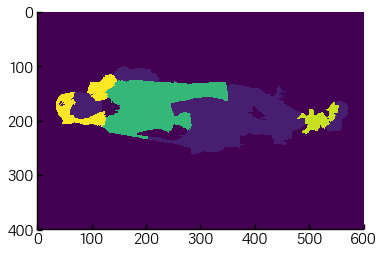

In [298]:
plt.imshow(new_color_image)

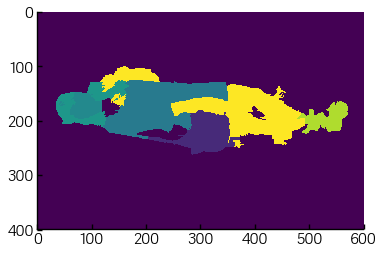

In [299]:
plt.imshow(new_label_image)

In [300]:
# since we have sub pixel labeling, we won't need a bounding box, because we can just apply a mask to the image before we
# input it into the neural network


# labels from https://github.com/pongsate1/fashion-parsing/blob/master/data/tmm_dataset_sharing/labels.txt
# I only want to classify clothing, so I'm going to not consider some of these categories.
labels = ['bk', 
    'T-shirt',
    'bag',
    'belt',
    'blazer',
    'blouse',
    'coat',
    'dress',
    'face',
    'hair',
    'hat',
    'jeans',
    'legging',
    'pants',
    'scarf',
    'shoe',
    'shorts',
    'skin',
    'skirt',
    'socks',
    'stocking',
    'sunglass',
    'sweater']

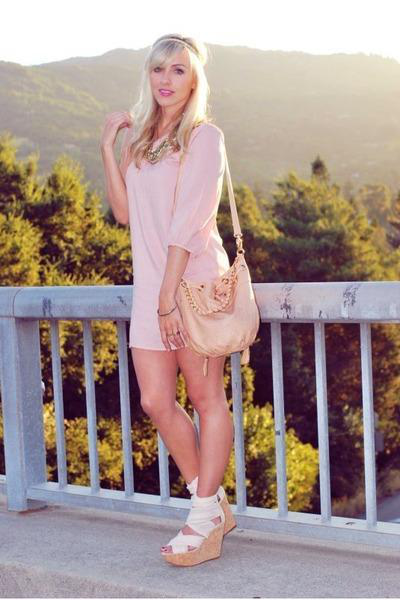

In [301]:
# Let's do load the images and do a comparison
from PIL import Image
image_path = '/Users/lisa/sandbox/iMaterialist_Challenge/data/tmm_dataset_sharing/image/{}'.format(image_name)
image = Image.open(image_path)
image

In [302]:
np.shape(new_label_image) # given in width x height

(400, 600)

In [303]:
np.shape(image)

(600, 400, 3)

240000
44351


(array([ 6090.,     0.,     0., 13385.,  6263.,     0.,     0.,     0.,
         2922., 15691.]),
 array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ]),
 <a list of 10 Patch objects>)

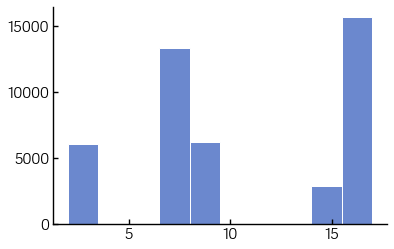

In [304]:
nonzero = new_label_image.flatten()
print(len(nonzero))
nonzero = nonzero[nonzero>0]
print(len(nonzero))
plt.hist(nonzero)

In [305]:
import pandas as pd
vcs = pd.Series(nonzero).value_counts()
types = vcs.index.values
for ty in types:
    print(ty, labels[int(ty)])

17.0 skin
7.0 dress
2.0 bag
9.0 hair
15.0 shoe
8.0 face


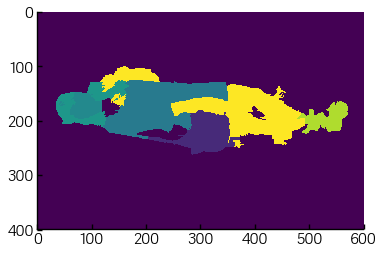

In [306]:
plt.imshow(new_label_image)

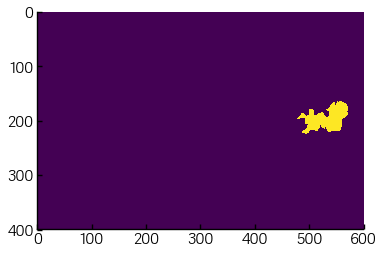

In [308]:
test = new_label_image.copy()
test[test != 15] = 0
plt.imshow(test)